## My Capstone Project - Topic TBD

The project will use Foursquare API and Machine Learning techniques to... TBD.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

# Web Request and scaping libraries
import urllib.request
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import json

#!pip install bs4
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#from bs4 import BeautifulSoup
#from urllib.request import urlopen


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Imports from Math Library
from math import sin, cos, sqrt, atan2, radians, degrees, asin

# Import from geopy
import geopy
from geopy.distance import geodesic

!conda install -c districtdatalabs yellowbrick
from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn.neighbors import DistanceMetric #various distance metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer


# K-Elbow
from scipy.spatial.distance import cdist 
import scipy.cluster.hierarchy as shc

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  py

In [2]:
# function that extracts the Foursquare category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

Make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="geo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of New York City, NY are 40.7127281, -74.0060152.


In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [51]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.tail()

Borough     Neighborhood   Latitude  Longitude
35  Manhattan       Turtle Bay  40.752042 -73.967708
36  Manhattan       Tudor City  40.746917 -73.971219
37  Manhattan  Stuyvesant Town  40.731000 -73.974052
38  Manhattan         Flatiron  40.739673 -73.990947
39  Manhattan     Hudson Yards  40.756658 -74.000111

In [14]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="geo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Manhattan, NY are 40.7896239, -73.9598939.


In [15]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [16]:
#calculate a distance matrix. convert lat/long to radians and then back to km
dist = DistanceMetric.get_metric('haversine')
neighborhoods_distance = pd.DataFrame(dist.pairwise(np.radians(manhattan_data[['Latitude','Longitude']]).to_numpy())*6373,  columns=manhattan_data.Neighborhood.unique(), index=manhattan_data.Neighborhood.unique())
neighborhoods_distance.head()

Marble Hill  Chinatown  Washington Heights     Inwood  \
Marble Hill            0.000000  19.235539            3.519773   1.326725   
Chinatown             19.235539   0.000000           15.910507  17.998692   
Washington Heights     3.519773  15.910507            0.000000   2.196236   
Inwood                 1.326725  17.998692            2.196236   0.000000   
Hamilton Heights       6.742834  12.584918            3.326478   5.457178   

                    Hamilton Heights  Manhattanville  Central Harlem  \
Marble Hill                 6.742834        7.709010        7.273141   
Chinatown                  12.584918       11.690107       11.963113   
Washington Heights          3.326478        4.254435        4.031233   
Inwood                      5.457178        6.413302        6.042070   
Hamilton Heights            0.000000        0.984994        1.008541   

                    East Harlem  Upper East Side  Yorkville  Lenox Hill  \
Marble Hill            9.792020        11.982947  11.605091   12.725608   
Chinatown              9.511606         7.257318   7.797294    6.557671   
Washington Heights     6.663450         8.712511   8.494091    9.501520   
Inwood                 8.610430        10.759270  10.436172   11.519821   
Hamilton Heights       3.518259         5.412442   5.307233    6.220455   

                    Roosevelt Island  Upper West Side  Lincoln Square  \
Marble Hill                13.130110        11.357413       13.069787   
Chinatown                   6.422889         8.143265        6.485295   
Washington Heights         10.035378         7.905129        9.624033   
Inwood                     11.971081        10.066166       11.782091   
Hamilton Heights            6.834622         4.614871        6.327269   

                      Clinton    Midtown  Murray Hill    Chelsea  \
Marble Hill         14.913657  14.813987    15.360499  16.668702   
Chinatown            4.839033   4.474123     3.876035   3.247320   
Washington Heights  11.463370  11.450974    12.039838  13.230346   
Inwood              13.624869  13.559674    14.122734  15.385442   
Hamilton Heights     8.170978   8.124586     8.716221   9.928729   

                    Greenwich Village  East Village  Lower East Side  \
Marble Hill                 18.260101     17.603738        18.621063   
Chinatown                    1.345164      1.697777         1.154722   
Washington Heights          14.878847     14.316910        15.368682   
Inwood                      17.000604     16.380634        17.411864   
Hamilton Heights            11.555075     10.998063        12.057805   

                      Tribeca  Little Italy       Soho  West Village  \
Marble Hill         19.190680     18.949141  18.768055     17.735781   
Chinatown            1.530892      0.484681   0.906829      2.320852   
Washington Heights  15.777368     15.599513  15.395264     14.309296   
Inwood              17.918532     17.702495  17.512148     16.457765   
Hamilton Heights    12.462966     12.273054  12.070347     11.000672   

                    Manhattan Valley  Morningside Heights   Gramercy  \
Marble Hill                 9.902385             8.843474  16.603065   
Chinatown                   9.431089            10.589588   2.636431   
Washington Heights          6.495405             5.385984  13.295629   
Inwood                      8.626704             7.548192  15.371339   
Hamilton Heights            3.172736             2.107889   9.973384   

                    Battery Park City  Financial District  Carnegie Hill  \
Marble Hill                 20.378035           20.643140      11.039296   
Chinatown                    1.948192            1.674802       8.221559   
Washington Heights          16.963322           17.262398       7.821463   
Inwood                      19.105635           19.384731       9.831909   
Hamilton Heights            13.649828           13.939069       4.561622   

                         Noho  Civic Center  Midtown South  Sutton Pl

In [17]:
CLIENT_ID = 'VN25CXKUDPGIPDDN1W1SKWLYUFJMSSCC2ZLZD1PSGPE3L13P' # your Foursquare ID
CLIENT_SECRET = 'VILSAWLYMRYFH1BQKVIZRL45NXJ1BPM4DINT43IDNCTGV5C3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500 #Radius parameter to be iterated using a distance function
category = ''

In [18]:
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    category,
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VN25CXKUDPGIPDDN1W1SKWLYUFJMSSCC2ZLZD1PSGPE3L13P&client_secret=VILSAWLYMRYFH1BQKVIZRL45NXJ1BPM4DINT43IDNCTGV5C3&v=20180605&ll=40.7896239,-73.9598939&categoryId=&radius=500&limit=100'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6113ab50156c3e741547e787'},
 'response': {'headerLocation': 'Central Park',
  'headerFullLocation': 'Central Park, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 29,
  'suggestedBounds': {'ne': {'lat': 40.794123904500005,
    'lng': -73.95396136384342},
   'sw': {'lat': 40.7851238955, 'lng': -73.96582643615658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a78425df964a52053e51fe3',
       'name': 'Central Park Tennis Center',
       'location': {'address': 'Central Park West at 96th St',
        'lat': 40.78931319964619,
        'lng': -73.96186241658044,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.78931319964619,
          'lng': -73.96186241658044}],
        'distance': 169,


In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


name                categories  \
0              Central Park Tennis Center              Tennis Court   
1                             East Meadow                     Field   
2          North Meadow Recreation Center         Recreation Center   
3             Oldest Tree in Central Park                      Park   
4   Central Park - 96th Street Playground                Playground   
5     Central Park - Wild West Playground                Playground   
6           Central Park - 99th & 5th Ave                      Park   
7                    North Meadow Field 2            Baseball Field   
8                    North Meadow Field 9            Baseball Field   
9              Robert Bendheim Playground                Playground   
10      Central Park - 97th St Transverse     Outdoors & Recreation   
11                Rudin Family Playground                Playground   
12         North Meadow Basketball Courts          Basketball Court   
13                  North Meadow Field 12            Baseball Field   
14                  North Meadow Field 11            Baseball Field   
15                   North Meadow Field 4            Baseball Field   
16              Central Park - East Drive                      Park   
17                               QDR Rock                      Park   
18      Central Park - Softball Field # 1            Baseball Field   
19                   North Meadow Field 5            Baseball Field   
20        W. 94th St. Canine Congregation                   Dog Run   
21                  North Meadow Field 10            Baseball Field   
22                   North Meadow Field 6            Baseball Field   
23                   North Meadow Field 7            Baseball Field   
24                      Citi Bike Station  Bike Rental / Bike Share   
25             MTA Subway - 96th St (B/C)             Metro Station   
26                  Coffee Cart - 96th St                Food Truck   
27   MTA Bus - M96/M106 (CPW & W 96th St)                  Bus Stop   
28      Bus Stop 96th & Central Park West               Bus Station   

          lat        lng  
0   40.789313 -73.961862  
1   40.790160 -73.955498  
2   40.791216 -73.959661  
3   40.789188 -73.957867  
4   40.787813 -73.956257  
5   40.789715 -73.965471  
6   40.788791 -73.955232  
7   40.792231 -73.961087  
8   40.792284 -73.956348  
9   40.790254 -73.954150  
10  40.788515 -73.955104  
11  40.791822 -73.964147  
12  40.791283 -73.959412  
13  40.791394 -73.958169  
14  40.791591 -73.958091  
15  40.792265 -73.959725  
16  40.790972 -73.956313  
17  40.791431 -73.956049  
18  40.793066 -73.960593  
19  40.793104 -73.958759  
20  40.789932 -73.964628  
21  40.792077 -73.956346  
22  40.792905 -73.957525  
23  40.792701 -73.957080  
24  40.791631 -73.964762  
25  40.791775 -73.964793  
26  40.791754 -73.964864  
27  40.791710 -73.964933  
28  40.791869 -73.964841

In [21]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[lat, lng], zoom_start=13)

# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
def getNearbyVenues(names, latitudes, longitudes, category, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'],
                                   category = '',
                                   radius=500
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [25]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       92                      92     92   
Carnegie Hill                           93                      93     93   
Central Harlem                          47                      47     47   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             41                      41     41   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                                92                      92     92   
Greenwich Village                      100                     100    100   
Hamilton Heights                        64                      64     64   
Hudson Yards                            76                      76     76   
Inwood                                  56                      56     56   
Lenox Hill                             100                     100    100   
Lincoln Square                          97                      97     97   
Little Italy                           100                     100    100   
Lower East Side                         50                      50     50   
Manhattan Valley                        51                      51     51   
Manhattanville                          46                      46     46   
Marble Hill                             23                      23     23   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     43                      43     43   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        31                      31     31   
Soho                                   100                     100    100   
Stuyvesant Town                         18                      18     18   
Sutton Place                           100                     100    100   
Tribeca                                 89                      89     89   
Tudor City                              80                      80     80   
Turtle Bay                             100                     100    100   
Upper East Side                         99                      99     99   
Upper West Side                         95                      95     95   
Washington Heights                      86                      86     86   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City                92               92              92  
Carnegie Hill                    93               93              93  
Central Harlem                   47               47              47  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      41               41              41  
East Village                    100              100             100  
Finan

In [26]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 335 uniques categories.


In [27]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Acupuncturist  Adult Boutique  \
0  Marble Hill                  0              0               0   
1  Marble Hill                  0              0               0   
2  Marble Hill                  0              0               0   
3  Marble Hill                  0              0               0   
4  Marble Hill                  0              0               0   

   Afghan Restaurant  African Restaurant  American Restaurant  Antique Shop  \
0                  0                   0                    0             0   
1                  0                   0                    0             0   
2                  0                   0                    0             0   
3                  0                   0                    0             0   
4                  0                   0                    0             0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                    0                 0                   0           0   
1                    0                 0                   0           0   
2                    0                 0                   0           0   
3                    0                 0                   0           0   
4                    0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Workshop  BBQ Joint  \
0                      0                    0              0          0   
1                      0                    0              0          0   
2                      0                    0              0          0   
3                      0                    0              0          0   
4                      0                    0              0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Basketball Court  Beer Bar  \
0           0           0       0     0    0                 0         0   
1           0           0       0     0    0                 0         0   
2           0           0       0     0    0                 0         0   
3           0           0       0     0    0                 0         0   
4           0           0       0     0    0                 0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0              0                         0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry  Bookstore  \
0          0           0       0           0              0          0   
1          0           0       0           0              0          0   
2          0           0       0           0              0          0   
3          0           0       0           0              0          0   
4          0           0       0           0              0          0   

   Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Bridal Shop  \
0         0           0                     0               0            0   
1         0           0                     0               0            0   
2         0           0                     0               0            0   
3         0           0                     0               0            0   
4         0           0                     0             

In [28]:
manhattan_onehot.shape

(3269, 336)

In [29]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

Neighborhood  Accessories Store  Acupuncturist  Adult Boutique  \
0  Battery Park City                0.0            0.0             0.0   
1      Carnegie Hill                0.0            0.0             0.0   
2     Central Harlem                0.0            0.0             0.0   
3            Chelsea                0.0            0.0             0.0   
4          Chinatown                0.0            0.0             0.0   

   Afghan Restaurant  African Restaurant  American Restaurant  Antique Shop  \
0                0.0             0.00000             0.010870           0.0   
1                0.0             0.00000             0.010753           0.0   
2                0.0             0.06383             0.042553           0.0   
3                0.0             0.00000             0.040000           0.0   
4                0.0             0.00000             0.040000           0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                0.000000     0.000000    0.000000   
1               0.0                0.010753     0.000000    0.021505   
2               0.0                0.000000     0.042553    0.000000   
3               0.0                0.000000     0.040000    0.000000   
4               0.0                0.000000     0.000000    0.000000   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                  0.0              0.00             0.01087     0.01087   
1                  0.0              0.00             0.00000     0.00000   
2                  0.0              0.00             0.00000     0.00000   
3                  0.0              0.01             0.00000     0.00000   
4                  0.0              0.02             0.00000     0.00000   

   Australian Restaurant  Austrian Restaurant  Auto Workshop  BBQ Joint  \
0                    0.0                 0.00            0.0   0.021739   
1                    0.0                 0.00            0.0   0.000000   
2                    0.0                 0.00            0.0   0.021277   
3                    0.0                 0.00            0.0   0.000000   
4                    0.0                 0.01            0.0   0.000000   

   Baby Store  Bagel Shop    Bakery      Bank       Bar  Basketball Court  \
0         0.0    0.000000  0.010870  0.000000  0.010870               0.0   
1         0.0    0.010753  0.021505  0.010753  0.032258               0.0   
2         0.0    0.021277  0.000000  0.000000  0.042553               0.0   
3         0.0    0.000000  0.050000  0.000000  0.010000               0.0   
4         0.0    0.000000  0.080000  0.000000  0.020000               0.0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0  0.000000     0.021739         0.0            0.0                       0.0   
1  0.000000     0.000000         0.0            0.0                       0.0   
2  0.021277     0.000000         0.0            0.0                       0.0   
3  0.010000     0.000000         0.0            0.0                       0.0   
4  0.000000     0.000000         0.0            0.0                       0.0   

   Bike Shop  Bike Trail   Bistro  Board Shop  Boat or Ferry  Bookstore  \
0        0.0         0.0  0.01087         0.0       0.032609   0.000000   
1        0.0         0.0  0.00000         0.0       0.000000   0.032258   
2        0.0         0.0  0.00000         0.0       0.000000   0.021277   
3        0.0         0.0  0.00000         0.0       0.000000   0.020000   
4        0.0         0.0  0.00000         0.0       0.000000   0.000000   

   Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Bridal Shop  \
0  0.010870         0.0                   0.0            0.00          0.0   
1  0.000000         0.0                   0.0            0.00          0.0   
2  0.021277         0.0                   0.0            0.00          0.0   
3  0.000000         0.0           

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park                 Hotel   
1      Carnegie Hill           Coffee Shop                  Café   
2     Central Harlem    African Restaurant  Gym / Fitness Center   
3            Chelsea           Coffee Shop                Bakery   
4          Chinatown    Chinese Restaurant                Bakery   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop        Clothing Store                   Gym   
1             Wine Shop           Pizza Place  Gym / Fitness Center   
2            Public Art    Seafood Restaurant    Chinese Restaurant   
3   American Restaurant           Art Gallery                 Hotel   
4          Cocktail Bar   American Restaurant          Dessert Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Boat or Ferry         Memorial Site           Pizza Place   
1                   Gym     French Restaurant           Yoga Studio   
2   Fried Chicken Joint           Art Gallery     French Restaurant   
3             Wine Shop        Ice Cream Shop     French Restaurant   
4    Salon / Barbershop          Optical Shop     Hotpot Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0           Beer Garden                  Plaza  
1             Bookstore                    Bar  
2                   Bar    American Restaurant  
3                Market           Cocktail Bar  
4    Mexican Restaurant         Ice Cream Shop

In [32]:
#from sklearn import preprocessing
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


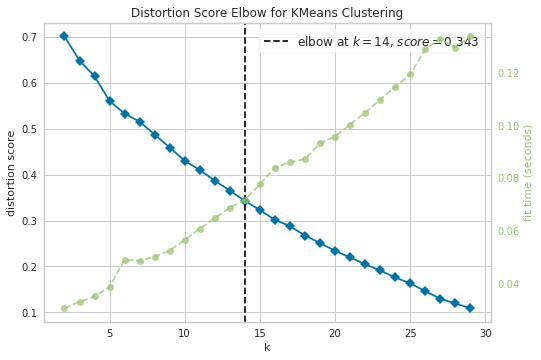

14
0.3425519357553607


In [33]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(manhattan_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

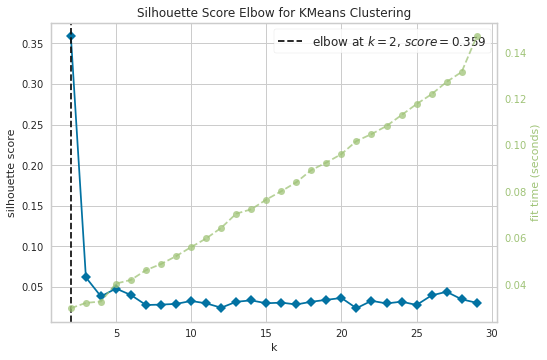

2
0.3586403885849731


In [34]:
# Silhouette Score for K means

model = KMeans(random_state=40)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings= True)
visualizer.fit(manhattan_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

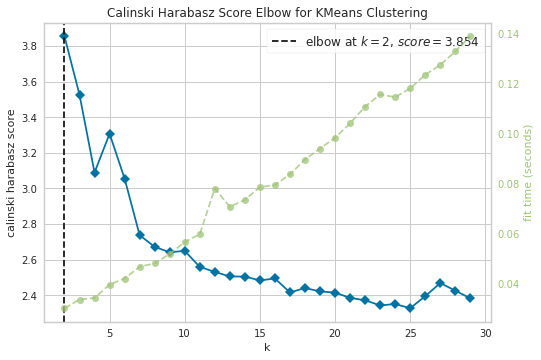

2
3.853676330417332


In [35]:
# Calinski Harabasz Score for K means

model = KMeans(random_state=40)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz', timings= True)
visualizer.fit(manhattan_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

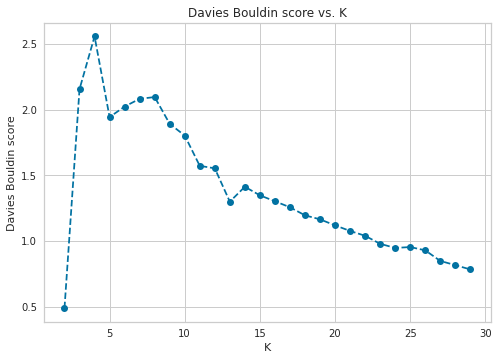

In [36]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, random_state=40)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(manhattan_grouped_clustering)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(manhattan_grouped_clustering, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(manhattan_grouped_clustering, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


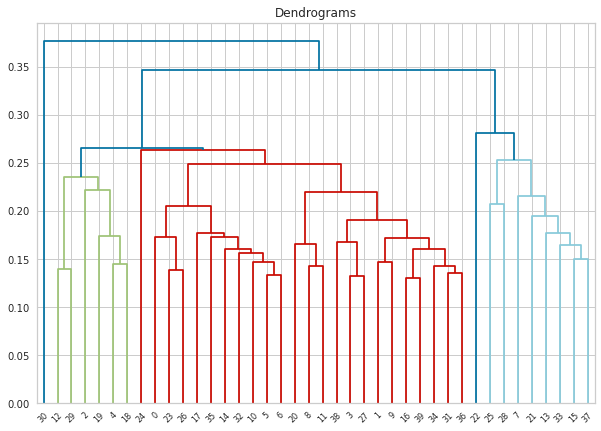

In [37]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(manhattan_grouped_clustering, method='ward'))

In [38]:
#s = manhattan_grouped_clustering.astype(bool).sum(axis=0)
#manhattan_grouped_clustering[s.sort_values(ascending=False)]
sorted_venuetypes = manhattan_grouped_clustering[manhattan_grouped_clustering.sum(0).sort_values(ascending=False).index]
sorted_venuetypes.head()

Coffee Shop  Italian Restaurant      Park      Café  Pizza Place  \
0     0.054348            0.010870  0.086957  0.000000     0.021739   
1     0.075269            0.010753  0.000000  0.064516     0.032258   
2     0.000000            0.000000  0.021277  0.021277     0.021277   
3     0.060000            0.020000  0.020000  0.010000     0.010000   
4     0.010000            0.010000  0.000000  0.000000     0.010000   

   American Restaurant    Bakery       Bar  Mexican Restaurant     Hotel  \
0             0.010870  0.010870  0.010870            0.010870  0.054348   
1             0.010753  0.021505  0.032258            0.010753  0.010753   
2             0.042553  0.000000  0.042553            0.000000  0.000000   
3             0.040000  0.050000  0.010000            0.000000  0.030000   
4             0.040000  0.080000  0.020000            0.020000  0.010000   

        Gym  Cocktail Bar  Gym / Fitness Center  Chinese Restaurant  \
0  0.032609      0.000000              0.000000            0.010870   
1  0.032258      0.021505              0.032258            0.010753   
2  0.021277      0.021277              0.042553            0.042553   
3  0.010000      0.020000              0.000000            0.010000   
4  0.000000      0.050000              0.000000            0.090000   

   Deli / Bodega  Sandwich Place  Sushi Restaurant  French Restaurant  \
0            0.0        0.021739          0.010870           0.000000   
1            0.0        0.000000          0.010753           0.032258   
2            0.0        0.000000          0.000000           0.042553   
3            0.0        0.010000          0.020000           0.030000   
4            0.0        0.020000          0.000000           0.000000   

   Seafood Restaurant  Wine Shop       Spa  Japanese Restaurant  \
0            0.010870   0.010870  0.000000             0.010870   
1            0.000000   0.043011  0.010753             0.021505   
2            0.042553   0.000000  0.021277             0.000000   
3            0.020000   0.030000  0.000000             0.010000   
4            0.000000   0.000000  0.020000             0.000000   

   Ice Cream Shop  Clothing Store  Thai Restaurant  Grocery Store  \
0        0.021739        0.043478         0.000000       0.010870   
1        0.000000        0.000000         0.010753       0.021505   
2        0.000000        0.000000         0.000000       0.021277   
3        0.030000        0.010000         0.010000       0.010000   
4        0.020000        0.000000         0.010000       0.000000   

   Cosmetics Shop  Burger Joint  Wine Bar  Indian Restaurant  Yoga Studio  \
0        0.010870      0.021739  0.000000           0.000000     0.000000   
1        0.021505      0.010753  0.010753           0.021505     0.032258   
2        0.021277      0.000000  0.000000           0.000000     0.000000   
3        0.010000      0.010000  0.000000           0.010000     0.000000   
4        0.010000      0.000000  0.010000           0.000000     0.010000   

   Dessert Shop  Steakhouse  Juice Bar  Mediterranean Restaurant  Restaurant  \
0      0.010870     0.01087   0.010870                  0.010870    0.000000   
1      0.000000     0.00000   0.000000                  0.010753    0.010753   
2      0.021277     0.00000   0.021277                  0.000000    0.000000   
3      0.010000     0.01000   0.000000                  0.000000    0.000000   
4      0.040000     0.00000   0.000000                  0.000000    0.000000   

   Bookstore  Diner  Art Gallery  Playground  Bagel Shop  \
0   0.000000   0.00     0.000000    0.021739    0.000000   
1   0.032258   0.00     0.000000    0.010753    0.010753   
2   0.021277   0.00     0.042553    0.000000    0.021277   
3   0.020000   0.00     0.040000    0.000000    0.000000   
4   0.000000   0.01     0.000000    0.000000    0.000000   

   New American Restaurant  Greek Restaurant  Korean Restaurant  Boutique  \
0                     0.00              0.00         

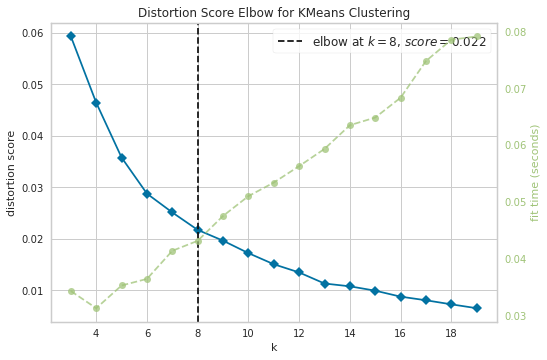

8
0.021746121406195723


In [39]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=20, init='k-means++')
visualizer = KElbowVisualizer(model, k=(3,20))

df=sorted_venuetypes.iloc[: , :4]

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

In [40]:
column_names = {'Features', 'K_distort', 'Score_distort', 'K_silhouet', 'Score_silhouet', 'K_calinski_har', 'Score_calinski_har'}

elbows = pd.DataFrame(columns = column_names)
elbows

Empty DataFrame
Columns: [Score_distort, K_silhouet, Score_calinski_har, Features, K_calinski_har, Score_silhouet, K_distort]
Index: []

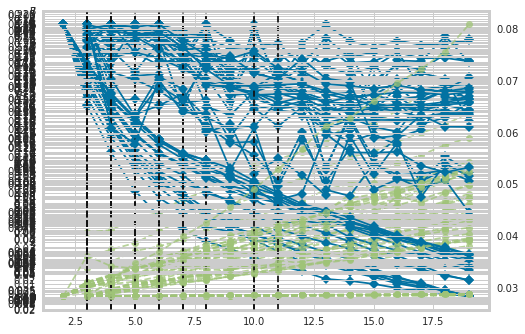

In [41]:
# of features vs optimal silhouette
#metrics ={'distortion','silhouette','calinski_harabasz'}

for i in range(4, 20, 1):
    df = sorted_venuetypes.iloc[: , :i]
    
    model = KMeans(random_state=20, init='k-means++')
    visualizer = KElbowVisualizer(model, k=(2,20))
    visualizer.fit(df)
    k_distortion=visualizer.elbow_value_
    score_distortion=visualizer.elbow_score_

    model = KMeans(random_state=20, init='k-means++')
    visualizer = KElbowVisualizer(model, k=(3,20), metric='silhouette')
    visualizer.fit(df)
    k_silhouette=visualizer.elbow_value_
    score_silhouette=visualizer.elbow_score_   

    model = KMeans(random_state=20, init='k-means++')
    visualizer = KElbowVisualizer(model, k=(3,20), metric='calinski_harabasz')
    visualizer.fit(df)
    k_calinski_harabasz=visualizer.elbow_value_
    score_calinski_harabasz=visualizer.elbow_score_          

    elbows = elbows.append({'Features': i,
                            'K_distort': k_distortion,
                            'Score_distort': score_distortion,                               
                            'K_silhouet': k_silhouette,
                            'Score_silhouet': score_silhouette,                              
                            'K_calinski_har': k_calinski_harabasz,
                            'Score_calinski_har': score_calinski_harabasz}, ignore_index=True)

In [42]:
elbows

Score_distort  K_silhouet  Score_calinski_har  Features  K_calinski_har  \
0        0.028792         6.0           20.123719       4.0             6.0   
1        0.041602         6.0           14.012869       5.0             3.0   
2        0.046047         6.0           11.982078       6.0             3.0   
3        0.049138         3.0           11.000003       7.0             3.0   
4        0.050490         6.0            9.944892       8.0             4.0   
5        0.084670         3.0            9.171083       9.0             4.0   
6        0.098700         3.0            8.663575      10.0             5.0   
7        0.092265         4.0            7.596163      11.0             5.0   
8        0.120670         3.0            7.631920      12.0             4.0   
9        0.126967         5.0            7.513217      13.0             4.0   
10       0.134916         3.0            7.230606      14.0             3.0   
11       0.102292         3.0            6.525062      15.0             3.0   
12       0.152682         3.0            6.676228      16.0             4.0   
13       0.157214         3.0            6.404796      17.0             4.0   
14       0.122904         3.0            6.003043      18.0             4.0   
15       0.176819         3.0            5.998899      19.0             3.0   

    Score_silhouet  K_distort  
0         0.311079        6.0  
1         0.253182        6.0  
2         0.211020        7.0  
3         0.179446        8.0  
4         0.172505       10.0  
5         0.168389        6.0  
6         0.188753        6.0  
7         0.147400        8.0  
8         0.139825        6.0  
9         0.137653        6.0  
10        0.170091        6.0  
11        0.159624       11.0  
12        0.146181        7.0  
13        0.143065        7.0  
14        0.140939       10.0  
15        0.145076        6.0

Text(0.5, 1.0, 'Optimal # of clusters (Elbow on y-axis) as a function of the number of featurse (X) and 3 cluster metrics')

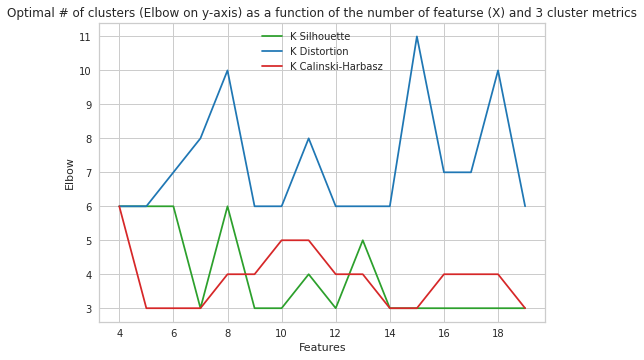

In [60]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Features')
ax1.set_ylabel('Elbow')

color = 'tab:green'
ax1.plot(elbows['Features'], elbows['K_silhouet'], color=color, label="K Silhouette")

color = 'tab:blue'
ax1.plot(elbows['Features'], elbows['K_distort'], color=color, label="K Distortion")

color = 'tab:red'
ax1.plot(elbows['Features'], elbows['K_calinski_har'], color=color, label="K Calinski-Harbasz")

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

plt.title('Optimal # of clusters (Elbow on y-axis) as a function of the number of featurse (X) and 3 cluster metrics')


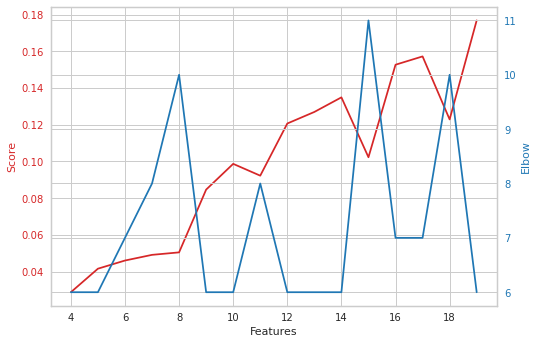

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Features')
ax1.set_ylabel('Score', color=color)
ax1.plot(elbows['Features'], elbows['Score_distort'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Elbow', color=color)  # we already handled the x-label with ax1
ax2.plot(elbows['Features'], elbows['K_distort'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


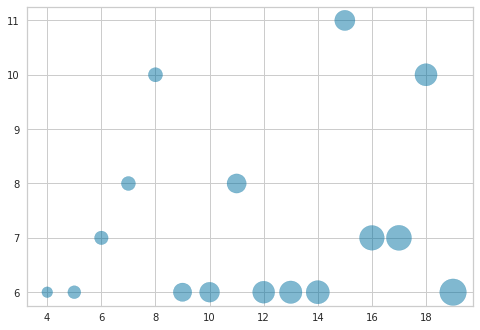

In [45]:
elbows['Features'], elbows['Score_distort']
x = elbows['Features']
y = elbows['K_distort']
area = (4000 * elbows['Score_distort'])

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

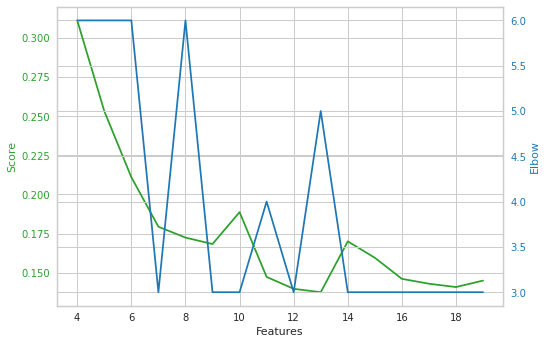

In [46]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Features')
ax1.set_ylabel('Score', color=color)
ax1.plot(elbows['Features'], elbows['Score_silhouet'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Elbow', color=color)  # we already handled the x-label with ax1
ax2.plot(elbows['Features'], elbows['K_silhouet'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

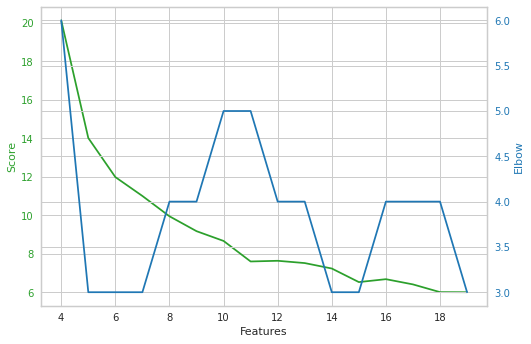

In [47]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Features')
ax1.set_ylabel('Score', color=color)
ax1.plot(elbows['Features'], elbows['Score_calinski_har'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Elbow', color=color)  # we already handled the x-label with ax1
ax2.plot(elbows['Features'], elbows['K_calinski_har'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [64]:
# set number of clusters
kclusters = 6

# run k-means clustering
model = KMeans(random_state=20, init='k-means++')
df = sorted_venuetypes.iloc[: , :4]

kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=20).fit(df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 5, 2, 1, 2, 1, 4, 2, 2, 1], dtype=int32)

In [65]:
# add clustering labels
#del neighborhoods_venues_sorted['Cluster Labels']
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               2   
1  Manhattan           Chinatown  40.715618 -73.994279               2   
2  Manhattan  Washington Heights  40.851903 -73.936900               5   
3  Manhattan              Inwood  40.867684 -73.921210               5   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               5   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place                   Gym           Yoga Studio   
1    Chinese Restaurant                Bakery          Cocktail Bar   
2                  Café                Bakery           Pizza Place   
3                  Café    Mexican Restaurant            Restaurant   
4           Pizza Place         Deli / Bodega                  Café   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0        Tennis Stadium         Deli / Bodega      Department Store   
1   American Restaurant          Dessert Shop    Salon / Barbershop   
2     Mobile Phone Shop    Chinese Restaurant         Grocery Store   
3                  Park    Chinese Restaurant  Caribbean Restaurant   
4           Coffee Shop    Mexican Restaurant             Juice Bar   

       7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
0                   Pharmacy                 Diner             Discount Store   
1               Optical Shop     Hotpot Restaurant         Mexican Restaurant   
2                Coffee Shop    Spanish Restaurant  Latin American Restaurant   
3                     Bakery           Pizza Place                      Diner   
4  Latin American Restaurant          Liquor Store           Sushi Restaurant   

  10th Most Common Venue  
0             Donut Shop  
1         Ice Cream Shop  
2        Supplement Shop  
3               Wine Bar  
4                   Park

In [66]:
# add clustering labels
#del sorted_venuetypes['Cluster Labels']
sorted_venuetypes.insert(0, 'Neighborhood', manhattan_grouped['Neighborhood'])
sorted_venuetypes.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged2 = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged2 = manhattan_merged2.join(sorted_venuetypes.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged2.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               2   
1  Manhattan           Chinatown  40.715618 -73.994279               2   
2  Manhattan  Washington Heights  40.851903 -73.936900               5   
3  Manhattan              Inwood  40.867684 -73.921210               5   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               5   

   Coffee Shop  Italian Restaurant      Park      Café  Pizza Place  \
0     0.043478            0.000000  0.000000  0.000000     0.043478   
1     0.010000            0.010000  0.000000  0.000000     0.010000   
2     0.023256            0.011628  0.023256  0.069767     0.046512   
3     0.017857            0.017857  0.035714  0.071429     0.035714   
4     0.046875            0.015625  0.031250  0.062500     0.093750   

   American Restaurant    Bakery       Bar  Mexican Restaurant     Hotel  \
0             0.043478  0.000000  0.000000            0.000000  0.000000   
1             0.040000  0.080000  0.020000            0.020000  0.010000   
2             0.011628  0.046512  0.011628            0.011628  0.000000   
3             0.017857  0.035714  0.017857            0.071429  0.000000   
4             0.000000  0.031250  0.000000            0.046875  0.015625   

        Gym  Cocktail Bar  Gym / Fitness Center  Chinese Restaurant  \
0  0.086957       0.00000              0.000000            0.000000   
1  0.000000       0.05000              0.000000            0.090000   
2  0.023256       0.00000              0.011628            0.034884   
3  0.000000       0.00000              0.000000            0.035714   
4  0.000000       0.03125              0.000000            0.031250   

   Deli / Bodega  Sandwich Place  Sushi Restaurant  French Restaurant  \
0       0.043478        0.086957          0.000000                0.0   
1       0.000000        0.020000          0.000000                0.0   
2       0.023256        0.011628          0.011628                0.0   
3       0.035714        0.000000          0.000000                0.0   
4       0.078125        0.031250          0.031250                0.0   

   Seafood Restaurant  Wine Shop   Spa  Japanese Restaurant  Ice Cream Shop  \
0            0.043478   0.000000  0.00             0.000000        0.043478   
1            0.000000   0.000000  0.02             0.000000        0.020000   
2            0.011628   0.023256  0.00             0.000000        0.011628   
3            0.017857   0.017857  0.00             0.000000        0.000000   
4            0.015625   0.000000  0.00             0.015625        0.000000   

   Clothing Store  Thai Restaurant  Grocery Store  Cosmetics Shop  \
0        0.000000         0.000000       0.000000        0.000000   
1        0.000000         0.010000       0.000000        0.010000   
2        0.011628         0.011628       0.034884        0.000000   
3        0.000000         0.000000       0.017857        0.000000   
4        0.000000         0.000000       0.000000        0.015625   

   Burger Joint  Wine Bar  Indian Restaurant  Yoga Studio  Dessert Shop  \
0      0.000000  0.000000           0.000000     0.043478          0.00   
1      0.000000  0.010000           0.000000     0.010000          0.04   
2      0.011628  0.011628           0.011628     0.000000          0.00   
3      0.000000  0.035714           0.000000     0.017857          0.00   
4      0.015625  0.015625           0.031250     0.031250          0.00   

   Steakhouse  Juice Bar  Mediterranean Restaurant  Restaurant  Bookstore  \
0    0.043478   0.000000                  0.000000    0.000000        0.0   
1    0.000000   0.000000                  0.000000    0.000000        0.0   
2    0.000000   0.000000                  0.000000    0.011628        0.0   
3    0.000000   0.017857                  0.000000    0.053571        0.0   
4    0.000000   0.031250                  0.015625    0.000000        0.0   

      

In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [68]:
df2 = manhattan_merged.sort_values(by='Cluster Labels')
df2

Borough         Neighborhood   Latitude  Longitude  Cluster Labels  \
37  Manhattan      Stuyvesant Town  40.731000 -73.974052               0   
32  Manhattan         Civic Center  40.715229 -74.005415               1   
5   Manhattan       Manhattanville  40.816934 -73.957385               1   
29  Manhattan   Financial District  40.707107 -74.010665               1   
25  Manhattan     Manhattan Valley  40.797307 -73.964286               1   
17  Manhattan              Chelsea  40.744035 -74.003116               1   
0   Manhattan          Marble Hill  40.876551 -73.910660               2   
33  Manhattan        Midtown South  40.748510 -73.988713               2   
31  Manhattan                 Noho  40.723259 -73.988434               2   
20  Manhattan      Lower East Side  40.717807 -73.980890               2   
16  Manhattan          Murray Hill  40.748303 -73.978332               2   
15  Manhattan              Midtown  40.754691 -73.981669               2   
19  Manhattan         East Village  40.727847 -73.982226               2   
1   Manhattan            Chinatown  40.715618 -73.994279               2   
7   Manhattan          East Harlem  40.792249 -73.944182               2   
6   Manhattan       Central Harlem  40.815976 -73.943211               2   
28  Manhattan    Battery Park City  40.711932 -74.016869               3   
26  Manhattan  Morningside Heights  40.808000 -73.963896               3   
11  Manhattan     Roosevelt Island  40.762160 -73.949168               3   
18  Manhattan    Greenwich Village  40.726933 -73.999914               4   
38  Manhattan             Flatiron  40.739673 -73.990947               4   
8   Manhattan      Upper East Side  40.775639 -73.960508               4   
10  Manhattan           Lenox Hill  40.768113 -73.958860               4   
34  Manhattan         Sutton Place  40.760280 -73.963556               4   
23  Manhattan                 Soho  40.722184 -74.000657               4   
24  Manhattan         West Village  40.734434 -74.006180               4   
12  Manhattan      Upper West Side  40.787658 -73.977059               4   
27  Manhattan             Gramercy  40.737210 -73.981376               4   
14  Manhattan              Clinton  40.759101 -73.996119               4   
9   Manhattan            Yorkville  40.775930 -73.947118               4   
35  Manhattan           Turtle Bay  40.752042 -73.967708               4   
36  Manhattan           Tudor City  40.746917 -73.971219               5   
2   Manhattan   Washington Heights  40.851903 -73.936900               5   
13  Manhattan       Lincoln Square  40.773529 -73.985338               5   
4   Manhattan     Hamilton Heights  40.823604 -73.949688               5   
30  Manhattan        Carnegie Hill  40.782683 -73.953256               5   
22  Manhattan         Little Italy  40.719324 -73.997305               5   
21  Manhattan              Tribeca  40.721522 -74.010683               5   
3   Manhattan               Inwood  40.867684 -73.921210               5   
39  Manhattan         Hudson Yards  40.756658 -74.000111               5   

   1st Most Common Venue    2nd Most Common Venue 3rd Most Common Venue  \
37                  Park                      Bar           Coffee Shop   
32           Coffee Shop                      Spa  Gym / Fitness Center   
5          Deli / Bodega              Coffee Shop    Seafood Restaurant   
29           Coffee Shop              Pizza Place                   Gym   
25    Mexican Restaurant              Coffee Shop                   Bar   
17           Coffee Shop                   Bakery   American Restaurant   
0         Sandwich Place                      Gym           Yoga Studio   
33     Korean Restaurant                    Hotel          Dessert Shop   
31          Cocktail Bar                    Hotel     French Restaurant   
20    Chinese Restaurant              Art Gallery      Ramen Restaurant   
16                 Hotel           Sandwich Place   Japanese Res

In [69]:
df1 = manhattan_merged2.sort_values(by='Cluster Labels')
del df1['Latitude']
del df1['Longitude']

df1
df1.style.background_gradient(cmap ='rainbow')